In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
# Load data
df = pd.read_csv('bike_data.csv', low_memory=False, parse_dates=['timestamp'])
df.sort_values(by=['timestamp'], inplace=True, ascending=True)

In [3]:
# Creating time features
df_tmp = df.copy()
df_tmp['Year'] = df_tmp.timestamp.dt.year
df_tmp['Month'] = df_tmp.timestamp.dt.month
df_tmp['Day'] = df_tmp.timestamp.dt.day
df_tmp['DayOfWeek'] = df_tmp.timestamp.dt.dayofweek
df_tmp['Hour'] = df_tmp.timestamp.dt.hour

In [4]:
# Select features and target
X = df_tmp[['station_id', 'Hour', 'Month', 'Day', 'DayOfWeek', 'weather_sunny', 'weather_rainy', 'holidays_public_holiday']]
y = df_tmp['demand']

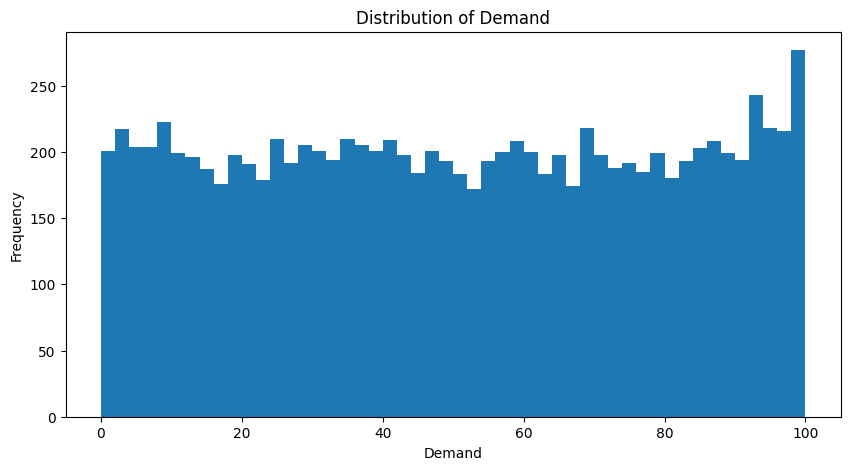

In [5]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 5))
plt.hist(y, bins=50)
plt.title('Distribution of Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Hyperparameter tuning
rf_grid = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 10, 1),
    'max_features': ['sqrt', 'log2'],
    'max_samples': [None]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid,
                              n_iter=50,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 50, 100, 150])},
                   verbose=True)

In [16]:
# Evaluate the model
y_pred = rs_model.predict(X_val)
print("Mean Absolute Error: ", mean_absolute_error(y_val, y_pred))
print("R2 Score: ", r2_score(y_val, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_val, y_pred))

Mean Absolute Error:  25.690499575671588
R2 Score:  -0.005374415003582378
Mean Squared Error:  877.0074043910187


In [17]:
# Print feature importances
feature_importances = rs_model.best_estimator_.feature_importances_
features = X.columns
for feature, importance in zip(features, feature_importances):
    print(f'{feature}: {importance}')

station_id: 0.23612251764143094
Hour: 0.20047191132872358
Month: 0.1448633288716134
Day: 0.21001021797891126
DayOfWeek: 0.11976123851134
weather_sunny: 0.027478108091857748
weather_rainy: 0.02679432285528344
holidays_public_holiday: 0.03449835472083952


In [18]:
# Check predictions
print("Sample Predictions vs Actual:")
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_val.iloc[i]}")

# Print best hyperparameters
print("Best Hyperparameters: ", rs_model.best_params_)

Sample Predictions vs Actual:
Predicted: 49.3977887621086, Actual: 15
Predicted: 48.873276735656, Actual: 46
Predicted: 48.95502644350355, Actual: 83
Predicted: 51.70038305854979, Actual: 45
Predicted: 51.254168262140055, Actual: 37
Predicted: 48.969182932979635, Actual: 99
Predicted: 51.32241414110416, Actual: 46
Predicted: 51.64406872149432, Actual: 43
Predicted: 49.298238714751115, Actual: 14
Predicted: 52.92578552568125, Actual: 30
Best Hyperparameters:  {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_samples': None, 'max_features': 'sqrt', 'max_depth': 10}


Using GridSearcCV

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [20]:
# Load data
df = pd.read_csv('bike_data.csv', low_memory=False, parse_dates=['timestamp'])
df.sort_values(by=['timestamp'], inplace=True, ascending=True)

In [21]:
# Creating time features
df_tmp = df.copy()
df_tmp['Year'] = df_tmp.timestamp.dt.year
df_tmp['Month'] = df_tmp.timestamp.dt.month
df_tmp['Day'] = df_tmp.timestamp.dt.day
df_tmp['DayOfWeek'] = df_tmp.timestamp.dt.dayofweek
df_tmp['Hour'] = df_tmp.timestamp.dt.hour

In [22]:
# Select features and target
X = df_tmp[['station_id', 'Hour', 'Month', 'Day', 'DayOfWeek', 'weather_sunny', 'weather_rainy', 'holidays_public_holiday']]
y = df_tmp['demand']

In [23]:
# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

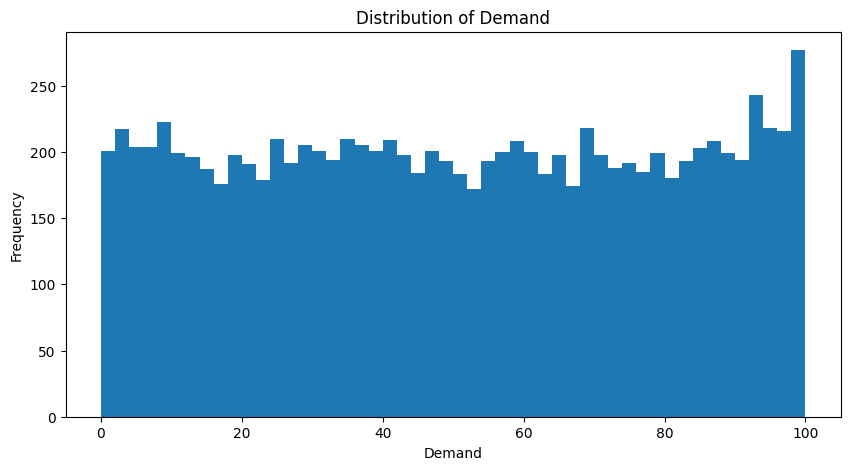

In [24]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 5))
plt.hist(y, bins=50)
plt.title('Distribution of Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [29]:
# Hyperparameter tuning
rf_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'max_samples': [None]
}

gs_model = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                        param_grid=rf_grid,
                        cv=5,
                        # n_iter=20,
                        verbose=True)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
# Evaluate the model
y_pred = gs_model.predict(X_val)
print("Mean Absolute Error: ", mean_absolute_error(y_val, y_pred))
print("R2 Score: ", r2_score(y_val, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_val, y_pred))

In [ ]:
# Print feature importances
feature_importances = gs_model.best_estimator_.feature_importances_
features = poly.get_feature_names_out(X.columns)
for feature, importance in zip(features, feature_importances):
    print(f'{feature}: {importance}')

In [ ]:
# Check predictions
print("Sample Predictions vs Actual:")
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_val.iloc[i]}")

# Print best hyperparameters
print("Best Hyperparameters: ", gs_model.best_params_)